In [1]:
from matplotlib import rc
# rc('text', usetex=True)

import pandas as pd
import json
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('random_mtsp.xls')

In [3]:
or_tools = df.iloc[:,1]
def parse_data(sub_df):
    data = []
    for datum in sub_df:
        try:
            perfs = [float(s) for s in re.findall("([0-9]+[,.]+[0-9]+)", datum)]
            data.append(perfs)
        except:
            pass
    return np.stack(data)

In [4]:
targer_index = 1 # 0: max makespan 1: mean makespan 2: mean util 5: std makespan
data_cols = [2, 1, 4, 5, 6,7]
ad = []
for data_col in data_cols:
    alog_results = df.iloc[:,data_col]
    alog_perfs = parse_data(alog_results)[:, targer_index]
    ad.append(alog_perfs)

In [6]:
aggregated_data = np.stack(ad).T # map size x algos

algos = ['ScheduleNet', 'OR-tools', 'FI', 'NI', 'NN', 'RI']
sizes = ['500x(30~50)','750x(30~50)']
sizes_latex = [r'$500 \times (30 \sim 50)$', 
               r'$750 \times (30 \sim 50)$'] 

aggregated_df = pd.DataFrame(aggregated_data[5:,:],
                             index=sizes,
                             columns=algos)

In [18]:
aggregated_data = aggregated_df.to_numpy()

In [32]:
def annotate_label(bar, value, size):
    height = bar.get_height()
    ax.annotate('{:.2f}'.format(value),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                size=size,
                textcoords="offset points",
                ha='center', va='bottom')

In [33]:
aggregated_data

array([[ 2.156,  7.66 ,  2.381,  2.302,  2.325,  2.302],
       [ 2.196, 10.844,  2.507,  2.404,  2.442,  2.426]])

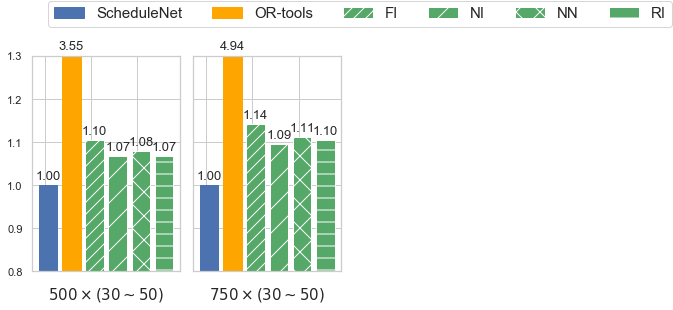

In [44]:
import seaborn as sns
sns.set_theme()
sns.set_style("whitegrid")

alpha = 1.0
bar_width = 0.15
colors = ['b','orange','g','g','g','g']
hatchs = [None, None ,'//', '/', 'x', '-']

y_min, y_max = 0.8, 1.3

x_label_size = 15
annote_size = 14

fig, axes = plt.subplots(1,len(sizes_latex), figsize=(5,4), sharey=True)
for i, (size, ax) in enumerate(zip(sizes_latex, axes)):

    viz_data = aggregated_data[i, :] / aggregated_data[i, 0]
    viz_data = np.clip(viz_data, y_min, y_max)
    sch_perf = aggregated_data[i, :] / aggregated_data[i, 0]
    
    bars = ax.bar(np.arange(len(algos)) + bar_width, viz_data,
                      alpha=alpha, color='g')
    ax.set_xlabel(size, size=x_label_size)
    ax.set_ylim(y_min, y_max)
    ax.set_xticklabels([])
    
    for ii, bar in enumerate(bars):        
        annotate_label(bar, sch_perf[ii], 13)


    for ii, c in enumerate(colors):
        if ii >= 2:
            bars[ii].set_hatch(hatchs[ii])
        else:
            bars[ii].set_color(c)

fig.legend(bar_list, algos, ncol=len(algos), bbox_to_anchor=(1.0, 1.10), 
           loc='upper center',
           fontsize=15)    
fig.tight_layout()